# RETAIL DATABASE ANALYSIS

In [213]:
#Importing important libraries 

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [214]:
#Importing the database 

store_data= pd.read_csv('/Users/sanjeevanisubba/Downloads/SuperStore_Orders.csv', encoding = "ISO-8859-1")
store_data.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,01-01-2011,06-01-2011,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,01-01-2011,08-01-2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,01-01-2011,05-01-2011,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,01-01-2011,05-01-2011,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",45,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,01-01-2011,08-01-2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",114,5,0.1,37.770,4.70,Medium,2011


In [215]:
store_data.describe()


,quantity,discount,profit,shipping_cost,year
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,3.476545,0.142908,28.641740,26.375915,2012.777208
std,2.278766,0.212280,174.424113,57.296804,1.098931
min,1.000000,0.000000,-6599.978000,0.000000,2011.000000
25%,2.000000,0.000000,0.000000,2.610000,2012.000000
50%,3.000000,0.000000,9.240000,7.790000,2013.000000
75%,5.000000,0.200000,36.810000,24.450000,2014.000000
max,14.000000,0.850000,8399.976000,933.570000,2014.000000


In [216]:
store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_id        51290 non-null  object 
 1   order_date      51290 non-null  object 
 2   ship_date       51290 non-null  object 
 3   ship_mode       51290 non-null  object 
 4   customer_name   51290 non-null  object 
 5   segment         51290 non-null  object 
 6   state           51290 non-null  object 
 7   country         51290 non-null  object 
 8   market          51290 non-null  object 
 9   region          51290 non-null  object 
 10  product_id      51290 non-null  object 
 11  category        51290 non-null  object 
 12  sub_category    51290 non-null  object 
 13  product_name    51290 non-null  object 
 14  sales           51290 non-null  object 
 15  quantity        51290 non-null  int64  
 16  discount        51290 non-null  float64
 17  profit          51290 non-null 

In [218]:
#converting data columns datatype to datetime 

store_data['order_date'] = pd.to_datetime(store_data['order_date'], errors='coerce')
store_data['ship_date']  = pd.to_datetime(store_data['ship_date'], errors='coerce')
store_data['sales'] = pd.to_numeric(store_data['sales'], errors='coerce')

In [219]:
store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        51290 non-null  object        
 1   order_date      51290 non-null  datetime64[ns]
 2   ship_date       51290 non-null  datetime64[ns]
 3   ship_mode       51290 non-null  object        
 4   customer_name   51290 non-null  object        
 5   segment         51290 non-null  object        
 6   state           51290 non-null  object        
 7   country         51290 non-null  object        
 8   market          51290 non-null  object        
 9   region          51290 non-null  object        
 10  product_id      51290 non-null  object        
 11  category        51290 non-null  object        
 12  sub_category    51290 non-null  object        
 13  product_name    51290 non-null  object        
 14  sales           48660 non-null  float64       
 15  qu

# GEOGRAPHICAL SEGMENTATION

          country  order_count
0   United States         9994
1       Australia         2837
2          France         2827
3          Mexico         2644
4         Germany         2065
5           China         1880
6  United Kingdom         1633
7          Brazil         1599
8           India         1555
9       Indonesia         1390


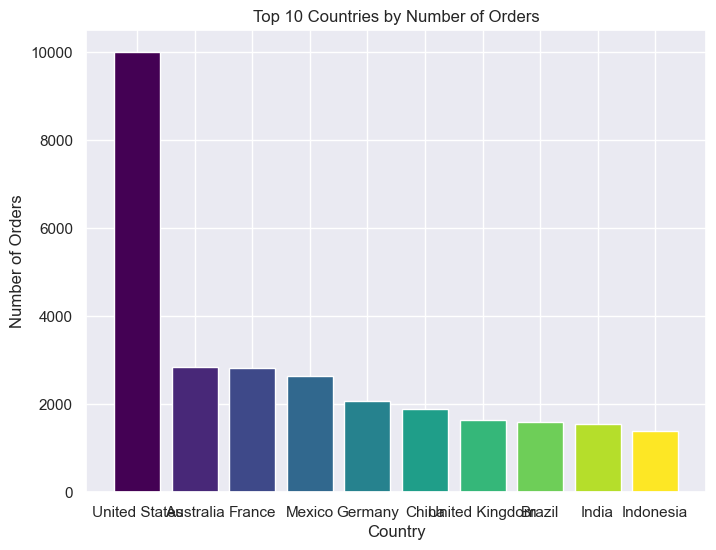

In [238]:

# Grouping the data by country and calculating the number of orders in each country
orders_by_country = store_data['country'].value_counts().reset_index().rename(columns={'index': 'country', 'country': 'order_count'})
orders_by_country = orders_by_country.sort_values('order_count', ascending=False)

# Selecting the top 10 countries
top_10_countries = orders_by_country.head(10)
print(top_10_countries)

# Setting the plot
plt.figure(figsize=(8, 6))
colors = plt.cm.viridis(np.linspace(0, 1, len(top_10_countries)))
plt.bar(top_10_countries['country'], top_10_countries['order_count'], color=colors)
plt.xlabel('Country')
plt.ylabel('Number of Orders')
plt.title('Top 10 Countries by Number of Orders')

plt.show()


In [ ]:
#linked tableau visualization board for countries and their no.of orders 

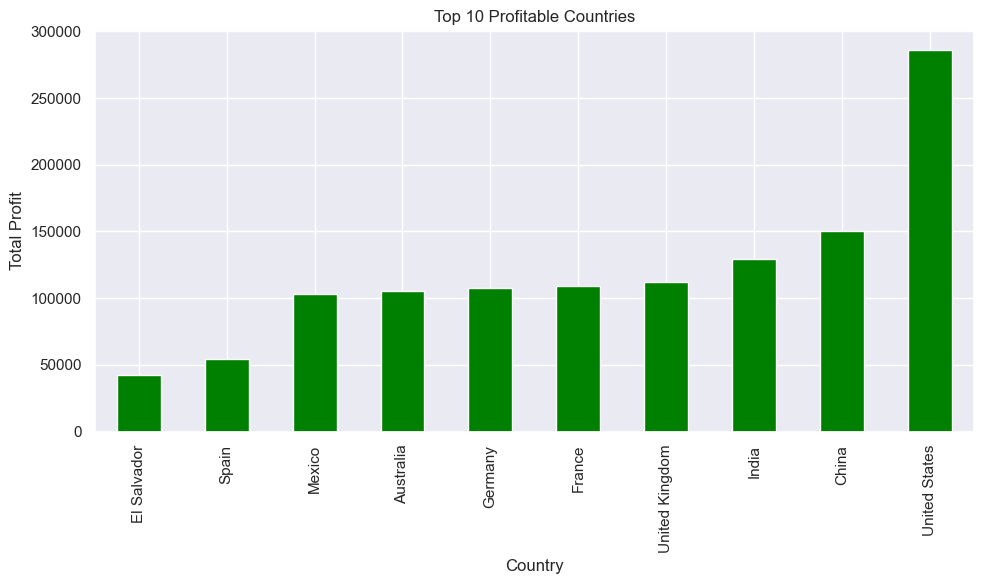

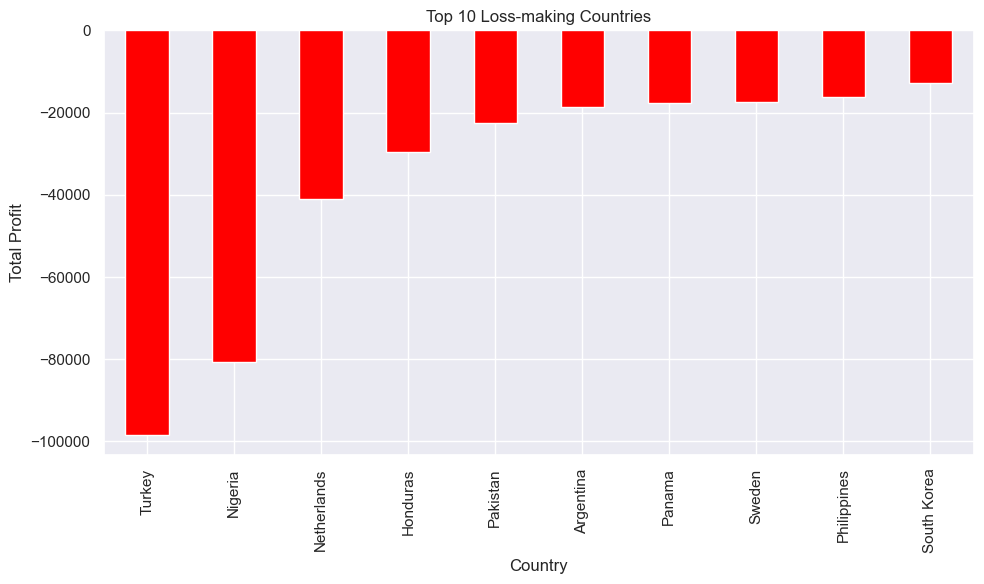

In [240]:
#Countries most profitable and loss making 

# Group the data by country and calculate the total profit
profit_per_country = store_data.groupby('country')['profit'].sum()

#Profitable countries
top_profitable_countries = profit_per_country.nlargest(10).sort_values()

#Loss making countries
top_loss_countries = profit_per_country.nsmallest(10)

# Plot the top 10 profitable countries
plt.figure(figsize=(10, 6))
top_profitable_countries.plot(kind='bar', color='green')
plt.title('Top 10 Profitable Countries')
plt.xlabel('Country')
plt.ylabel('Total Profit')
plt.tight_layout()
plt.show()

# Plot the top 10 loss-making countries
plt.figure(figsize=(10, 6))
top_loss_countries.plot(kind='bar', color='red')
plt.title('Top 10 Loss-making Countries')
plt.xlabel('Country')
plt.ylabel('Total Profit')
plt.tight_layout()
plt.show()

In [ ]:
#linked tableau visualisation board for profit and loss per country 

# PRODUCT ANALYSIS

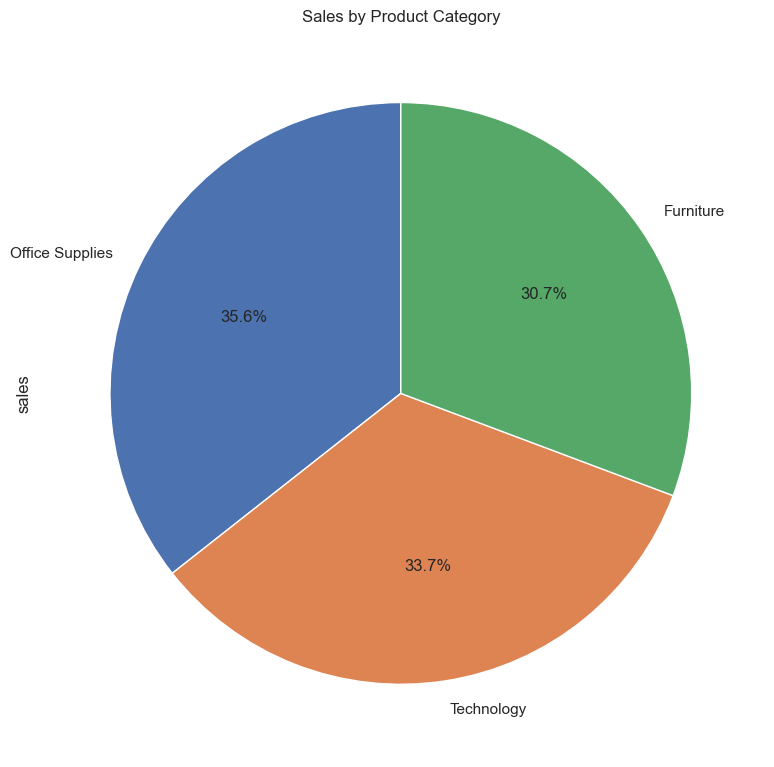

In [195]:
# Group the data by product category and calculate the total sales
sales_by_category = store_data.groupby('category')['sales'].sum()

# Sort the sales in descending order
sales_by_category = sales_by_category.sort_values(ascending=False)

# Plot the sales by product category using a bar chart
plt.figure(figsize=(8, 8))
sales_by_category.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Sales by Product Category')

# Display the plot
plt.tight_layout()
plt.show()


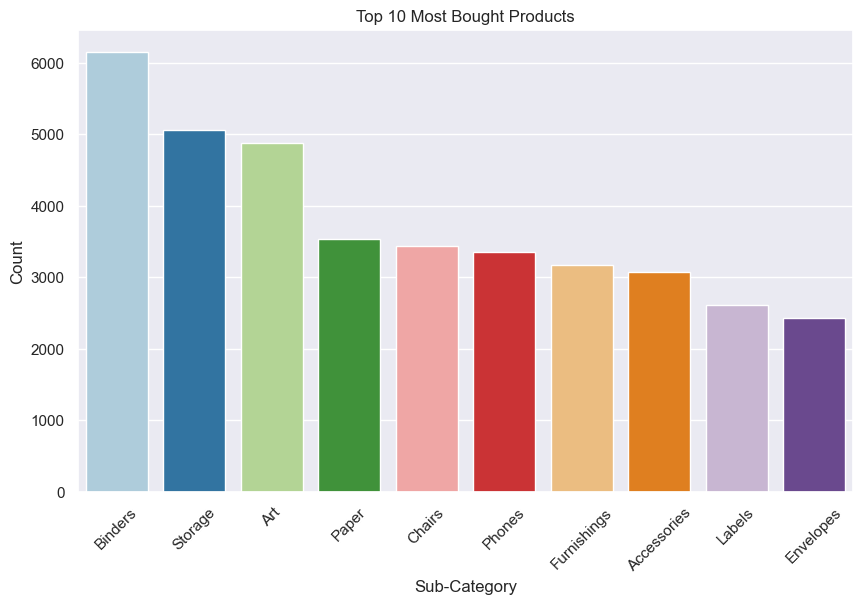

In [198]:
# Calculate the count of each sub-category
top_products = store_data['sub_category'].value_counts().head(10)

# Plot the top products using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.index, y=top_products.values, palette='Paired')
plt.xlabel('Sub-Category')
plt.ylabel('Count')
plt.title('Top 10 Most Bought Products')
plt.xticks(rotation=45)
plt.show()

# CUSTOMER SEGMENTATION ANALYSIS

In [196]:
#customer segmentation 
cust_segment = pd.DataFrame(store_data['segment'].unique(), columns=["segment"])
print(cust_segment)

       segment
0     Consumer
1  Home Office
2    Corporate


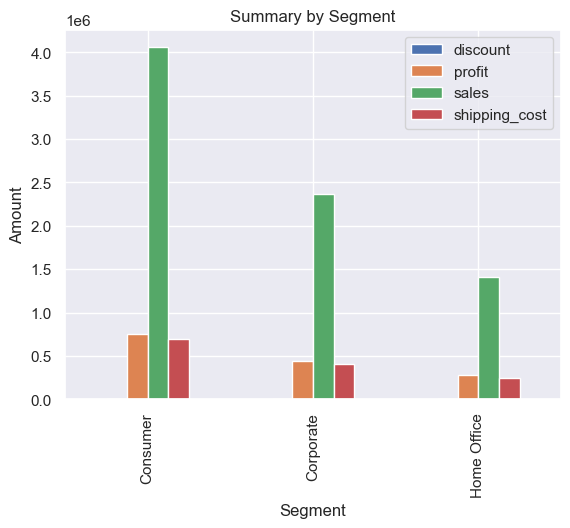

In [197]:
# Group the data by segment and calculate the sum of discount, profit, sales, and shipping cost
segment_summary = store_data.groupby('segment')[['discount', 'profit', 'sales', 'shipping_cost']].sum()

# Visualize the summary using a bar plot
segment_summary.plot(kind='bar')
plt.xlabel('Segment')
plt.ylabel('Amount')
plt.title('Summary by Segment')
plt.legend(loc='upper right')
plt.show()

# SHIPPING ANALYSIS

In [208]:
shipping_mode_count= store_data["ship_mode"].value_counts()
print(shipping_mode_count)

Standard Class    30775
Second Class      10309
First Class        7505
Same Day           2701
Name: ship_mode, dtype: int64


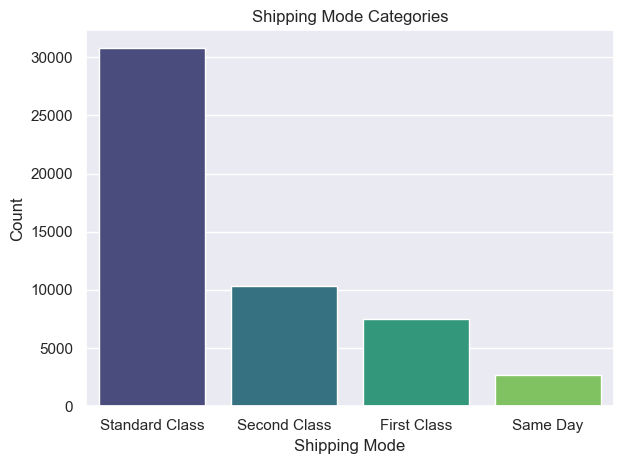

In [230]:
sns.barplot(x=shipping_mode_count.index, y=shipping_mode_count.values, palette='viridis')
plt.title('Shipping Mode Categories')
plt.xlabel('Shipping Mode')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

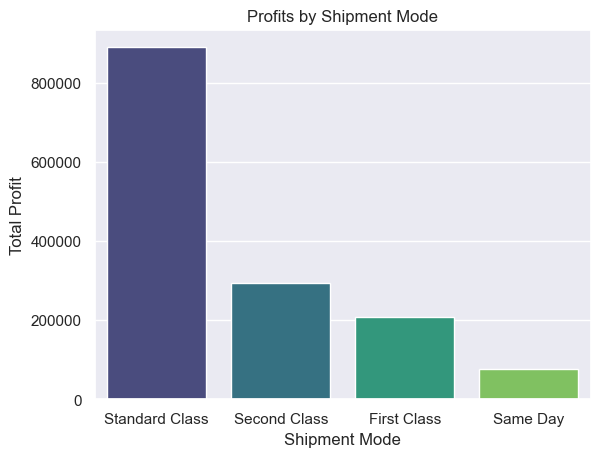

In [201]:
# Calculate the total profits per shipment mode
profits_per_mode = store_data.groupby('ship_mode')['profit'].sum()

# Create a DataFrame to combine the counts and profits
shipping_mode_data = pd.DataFrame({'Order Count': shipping_mode_count, 'Total Profit': profits_per_mode})

# Sort the data by total profit in descending order
shipping_mode_data = shipping_mode_data.sort_values(by='Total Profit', ascending=False)

# Visualize the profits by shipment mode
sns.barplot(x=shipping_mode_data.index, y='Total Profit', data=shipping_mode_data, palette='viridis')
plt.xlabel('Shipment Mode')
plt.ylabel('Total Profit')
plt.title('Profits by Shipment Mode')
plt.show()

# SALES AND PROFIT ANALYSIS 

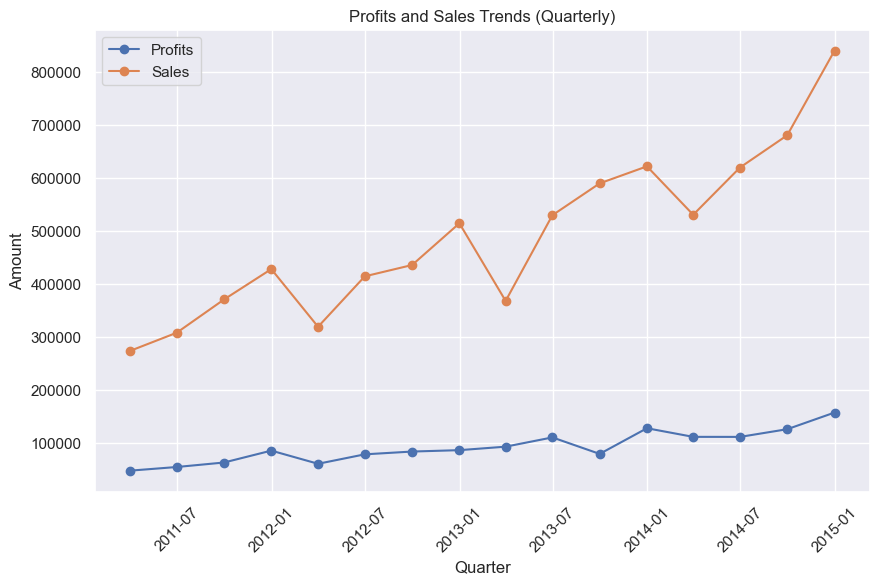

In [205]:
# Set the 'order_date' column as the index
store_data.set_index('order_date', inplace=True)

# Resample the data on a quarterly basis and calculate the sum of profits and sales
quarterly_data = store_data.resample('Q')['profit', 'sales'].sum()

# Plot the profits and sales trends
plt.figure(figsize=(10, 6))
plt.plot(quarterly_data.index, quarterly_data['profit'], marker='o', label='Profits')
plt.plot(quarterly_data.index, quarterly_data['sales'], marker='o', label='Sales')
plt.xlabel('Quarter')
plt.ylabel('Amount')
plt.title('Profits and Sales Trends (Quarterly)')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [ ]:
#tableau visualisation graphs - quarterly profits and sales per segment 